# Exploration of Poverty in Logan, Philadelphia
by Angela Mishky

*Data from the Census Bureau and Open Data Philly are used to explore poverty rates in Philadelphia as compared to poverty rates in Logan, Philadelphia at the neighborhood level. A spatial file of Philly Census tracts is used to map ACS data on poverty rates sourced from Social Explorer.*

First, I'll import the libraries I need to visualize and explore the data.

In [15]:
import pandas as pd
import geopandas as gpd

Loading and reading the file

In [17]:
df = pd.read_csv('Logan_HHIncome.csv')

Looking at the size of the dataset

In [18]:
df.shape

(6, 72)

below are the first five rows

In [19]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,42101028000,"Census Tract 280, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9077,NaN,NaN,NaN,...,51,166,87,107,107,195,43,21,0,26
1,42101028100,"Census Tract 281, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9078,NaN,NaN,NaN,...,83,114,39,333,59,257,68,22,202,0
2,42101028200,"Census Tract 282, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9079,NaN,NaN,NaN,...,32,0,78,210,99,175,127,0,104,4
3,42101028300,"Census Tract 283, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9080,NaN,NaN,NaN,...,97,112,32,294,471,86,11,0,0,0
4,42101028400,"Census Tract 284, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9081,NaN,NaN,NaN,...,29,36,70,79,49,47,43,67,0,0


But there are only 6!

In [20]:
df

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,42101028000,"Census Tract 280, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9077,NaN,NaN,NaN,...,51,166,87,107,107,195,43,21,0,26
1,42101028100,"Census Tract 281, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9078,NaN,NaN,NaN,...,83,114,39,333,59,257,68,22,202,0
2,42101028200,"Census Tract 282, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9079,NaN,NaN,NaN,...,32,0,78,210,99,175,127,0,104,4
3,42101028300,"Census Tract 283, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9080,NaN,NaN,NaN,...,97,112,32,294,471,86,11,0,0,0
4,42101028400,"Census Tract 284, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9081,NaN,NaN,NaN,...,29,36,70,79,49,47,43,67,0,0
5,42101028500,"Census Tract 285, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9082,NaN,NaN,NaN,...,57,52,54,22,63,391,64,0,0,2


Inspecting the data types

In [21]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       6 non-null      int64  
 1   Geo_QName      6 non-null      object 
 2   Geo_FILEID     6 non-null      object 
 3   Geo_STUSAB     6 non-null      object 
 4   Geo_SUMLEV     6 non-null      int64  
 5   Geo_GEOCOMP    6 non-null      int64  
 6   Geo_LOGRECNO   6 non-null      int64  
 7   Geo_US         0 non-null      float64
 8   Geo_REGION     0 non-null      float64
 9   Geo_DIVISION   0 non-null      float64
 10  Geo_STATECE    0 non-null      float64
 11  Geo_STATE      6 non-null      int64  
 12  Geo_COUNTY     6 non-null      int64  
 13  Geo_COUSUB     0 non-null      float64
 14  Geo_PLACE      0 non-null      float64
 15  Geo_TRACT      6 non-null      int64  
 16  Geo_BLKGRP     0 non-null      float64
 17  Geo_CONCIT     0 non-null      float64
 18  Geo_AIANHH    

I'll need to make sure all of the geography variables are read in as strings

In [22]:
df = pd.read_csv(
    'Logan_HHIncome.csv',
    dtype=
    {
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT':str, 
        'Geo_FIPS':str
    }
)

check that

In [23]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,42101028000,"Census Tract 280, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9077,NaN,NaN,NaN,...,51,166,87,107,107,195,43,21,0,26
1,42101028100,"Census Tract 281, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9078,NaN,NaN,NaN,...,83,114,39,333,59,257,68,22,202,0
2,42101028200,"Census Tract 282, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9079,NaN,NaN,NaN,...,32,0,78,210,99,175,127,0,104,4
3,42101028300,"Census Tract 283, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9080,NaN,NaN,NaN,...,97,112,32,294,471,86,11,0,0,0
4,42101028400,"Census Tract 284, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9081,NaN,NaN,NaN,...,29,36,70,79,49,47,43,67,0,0


In [24]:
df.Geo_STATE

0    42
1    42
2    42
3    42
4    42
5    42
Name: Geo_STATE, dtype: object

time to do the same for my larger dataset

In [25]:
phdf = pd.read_csv(
    'Philly_HHIncome.csv',
    dtype=
    {
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT':str, 
        'Geo_FIPS':str
    }
)

In [26]:
phdf.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,42101000101,"Census Tract 1.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8807,NaN,NaN,NaN,...,13,76,7,31,168,264,229,143,125,235
1,42101000102,"Census Tract 1.02, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8808,NaN,NaN,NaN,...,0,29,52,52,276,386,134,95,374,306
2,42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8809,NaN,NaN,NaN,...,32,147,0,82,86,269,93,12,36,525
3,42101000300,"Census Tract 3, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8810,NaN,NaN,NaN,...,36,14,21,78,227,533,197,78,253,332
4,42101000401,"Census Tract 4.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8811,NaN,NaN,NaN,...,16,0,84,103,123,407,106,95,95,191


In [27]:
phdf.shape

(408, 72)

In [28]:
phdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       408 non-null    object 
 1   Geo_QName      408 non-null    object 
 2   Geo_FILEID     408 non-null    object 
 3   Geo_STUSAB     408 non-null    object 
 4   Geo_SUMLEV     408 non-null    int64  
 5   Geo_GEOCOMP    408 non-null    int64  
 6   Geo_LOGRECNO   408 non-null    int64  
 7   Geo_US         0 non-null      float64
 8   Geo_REGION     0 non-null      float64
 9   Geo_DIVISION   0 non-null      float64
 10  Geo_STATECE    0 non-null      float64
 11  Geo_STATE      408 non-null    object 
 12  Geo_COUNTY     408 non-null    object 
 13  Geo_COUSUB     0 non-null      float64
 14  Geo_PLACE      0 non-null      float64
 15  Geo_TRACT      408 non-null    object 
 16  Geo_BLKGRP     0 non-null      float64
 17  Geo_CONCIT     0 non-null      float64
 18  Geo_AIANHH

data types are correct
let's delete the columns with null values for both datasets

In [29]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [30]:
df = df.dropna(axis=1,how="all")

checking that

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       6 non-null      object
 1   Geo_QName      6 non-null      object
 2   Geo_FILEID     6 non-null      object
 3   Geo_STUSAB     6 non-null      object
 4   Geo_SUMLEV     6 non-null      int64 
 5   Geo_GEOCOMP    6 non-null      int64 
 6   Geo_LOGRECNO   6 non-null      int64 
 7   Geo_STATE      6 non-null      object
 8   Geo_COUNTY     6 non-null      object
 9   Geo_TRACT      6 non-null      object
 10  Geo_GEOID      6 non-null      object
 11  Geo_NAME       6 non-null      object
 12  SE_A14001_001  6 non-null      int64 
 13  SE_A14001_002  6 non-null      int64 
 14  SE_A14001_003  6 non-null      int64 
 15  SE_A14001_004  6 non-null      int64 
 16  SE_A14001_005  6 non-null      int64 
 17  SE_A14001_006  6 non-null      int64 
 18  SE_A14001_007  6 non-null      int

other dataset

In [32]:
phdf.columns[phdf.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [33]:
phdf = phdf.dropna(axis=1,how="all")

In [34]:
phdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       408 non-null    object
 1   Geo_QName      408 non-null    object
 2   Geo_FILEID     408 non-null    object
 3   Geo_STUSAB     408 non-null    object
 4   Geo_SUMLEV     408 non-null    int64 
 5   Geo_GEOCOMP    408 non-null    int64 
 6   Geo_LOGRECNO   408 non-null    int64 
 7   Geo_STATE      408 non-null    object
 8   Geo_COUNTY     408 non-null    object
 9   Geo_TRACT      408 non-null    object
 10  Geo_GEOID      408 non-null    object
 11  Geo_NAME       408 non-null    object
 12  SE_A14001_001  408 non-null    int64 
 13  SE_A14001_002  408 non-null    int64 
 14  SE_A14001_003  408 non-null    int64 
 15  SE_A14001_004  408 non-null    int64 
 16  SE_A14001_005  408 non-null    int64 
 17  SE_A14001_006  408 non-null    int64 
 18  SE_A14001_007  408 non-null   

In [35]:
df

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,42101028000,"Census Tract 280, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9077,42,101,028000,...,51,166,87,107,107,195,43,21,0,26
1,42101028100,"Census Tract 281, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9078,42,101,028100,...,83,114,39,333,59,257,68,22,202,0
2,42101028200,"Census Tract 282, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9079,42,101,028200,...,32,0,78,210,99,175,127,0,104,4
3,42101028300,"Census Tract 283, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9080,42,101,028300,...,97,112,32,294,471,86,11,0,0,0
4,42101028400,"Census Tract 284, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9081,42,101,028400,...,29,36,70,79,49,47,43,67,0,0
5,42101028500,"Census Tract 285, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9082,42,101,028500,...,57,52,54,22,63,391,64,0,0,2


In [36]:
phdf.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,42101000101,"Census Tract 1.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8807,42,101,000101,...,13,76,7,31,168,264,229,143,125,235
1,42101000102,"Census Tract 1.02, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8808,42,101,000102,...,0,29,52,52,276,386,134,95,374,306
2,42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8809,42,101,000200,...,32,147,0,82,86,269,93,12,36,525
3,42101000300,"Census Tract 3, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8810,42,101,000300,...,36,14,21,78,227,533,197,78,253,332
4,42101000401,"Census Tract 4.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8811,42,101,000401,...,16,0,84,103,123,407,106,95,95,191


In [37]:
phdf.shape

(408, 29)

perfect, much more manageable

getting rid of the columns I don't need based on the data dictionary

In [38]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_001',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017']

In [39]:
df2 = df[columns_to_keep]

In [40]:
df2.shape

(6, 18)

In [41]:
df2

,Geo_FIPS,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,42101028000,1735,277,166,138,125,35,191,51,166,87,107,107,195,43,21,0,26
1,42101028100,1917,115,247,95,62,129,92,83,114,39,333,59,257,68,22,202,0
2,42101028200,2216,419,350,143,92,60,323,32,0,78,210,99,175,127,0,104,4
3,42101028300,2532,513,507,76,185,48,100,97,112,32,294,471,86,11,0,0,0
4,42101028400,1363,294,185,105,175,92,92,29,36,70,79,49,47,43,67,0,0
5,42101028500,1116,125,136,84,35,31,0,57,52,54,22,63,391,64,0,0,2


other dataset

In [42]:
phdf2 = phdf[columns_to_keep]

In [43]:
phdf2.shape

(408, 18)

In [44]:
phdf2.head()

,Geo_FIPS,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,42101000101,1350,30,0,29,0,0,0,13,76,7,31,168,264,229,143,125,235
1,42101000102,1840,23,82,0,17,14,0,0,29,52,52,276,386,134,95,374,306
2,42101000200,1628,138,84,26,12,59,27,32,147,0,82,86,269,93,12,36,525
3,42101000300,2085,107,70,23,24,42,50,36,14,21,78,227,533,197,78,253,332
4,42101000401,1849,186,206,119,40,41,37,16,0,84,103,123,407,106,95,95,191


looks great!

Now I'd like to rename these columns to be comprehensible

In [45]:
columns = df2.columns.to_list()

In [46]:
columns
# note: I reran this!! so they used to be code whoops

['FIPS',
 'Households',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more']

In [64]:
df2.columns = ['FIPS',
 'Households',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more']

In [65]:
df2

,FIPS,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"
0,42101028000,1735,277,166,138,125,35,191,51,166,87,107,107,195,43,21,0,26
1,42101028100,1917,115,247,95,62,129,92,83,114,39,333,59,257,68,22,202,0
2,42101028200,2216,419,350,143,92,60,323,32,0,78,210,99,175,127,0,104,4
3,42101028300,2532,513,507,76,185,48,100,97,112,32,294,471,86,11,0,0,0
4,42101028400,1363,294,185,105,175,92,92,29,36,70,79,49,47,43,67,0,0
5,42101028500,1116,125,136,84,35,31,0,57,52,54,22,63,391,64,0,0,2


In [88]:
columns = phdf2.columns.to_list()
columns

['Geo_FIPS',
 'SE_A14001_001',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [89]:
phdf2.columns = ['FIPS',
'Households',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more']

In [90]:
phdf2

,FIPS,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"
0,42101000101,1350,30,0,29,0,0,0,13,76,7,31,168,264,229,143,125,235
1,42101000102,1840,23,82,0,17,14,0,0,29,52,52,276,386,134,95,374,306
2,42101000200,1628,138,84,26,12,59,27,32,147,0,82,86,269,93,12,36,525
3,42101000300,2085,107,70,23,24,42,50,36,14,21,78,227,533,197,78,253,332
4,42101000401,1849,186,206,119,40,41,37,16,0,84,103,123,407,106,95,95,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,42101980905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
404,42101980906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
405,42101989100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
406,42101989200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's calculate some stats and plot some data

What are the mean and median number of households per census tract in Philly?

In [95]:
phdf2['Households'].mean()

1584.8235294117646

In [96]:
phdf2['Households'].median()

1626.0

About 1,584 households per tract on average and a mean of 1,626 per tract

What about in Logan?

In [97]:
df2['Households'].mean()

1813.1666666666667

In [99]:
df2['Households'].median()

1826.0

Both numbers are higher in Logan, meaning Logan is on average denser in terms of households than Philly as a whole.

We can also plot the Philly household distribution to find out more about the dataset

<AxesSubplot: ylabel='Frequency'>

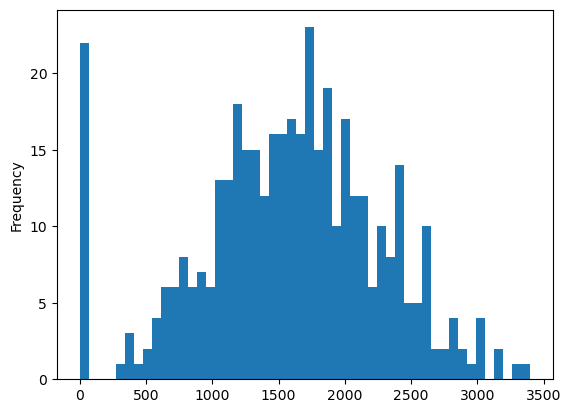

In [105]:
phdf2['Households'].plot.hist(bins=50)

We can see from this that the Philly-level data distribution is negatively skewed because of a number of census tracts which include 0 people.

I wonder if any of the census tracts with the greatest number of households in Philly are in Logan

Let's check

In [107]:
phdf_sorted = phdf2.sort_values(by='Households',ascending = False)

In [108]:
phdf_sorted[['FIPS','Households']].head(10)

,FIPS,Households
239,42101025200,3400
159,42101015800,3295
316,42101033000,3148
118,42101011400,3132
345,42101035500,3058
52,42101003901,3036
88,42101008500,3002
84,42101008200,2998
331,42101034400,2979
314,42101032600,2919


In bar chart form:

<AxesSubplot: title={'center': 'Top 10 Census Tracts with the Most Households in Philly in 2021'}, ylabel='FIPS'>

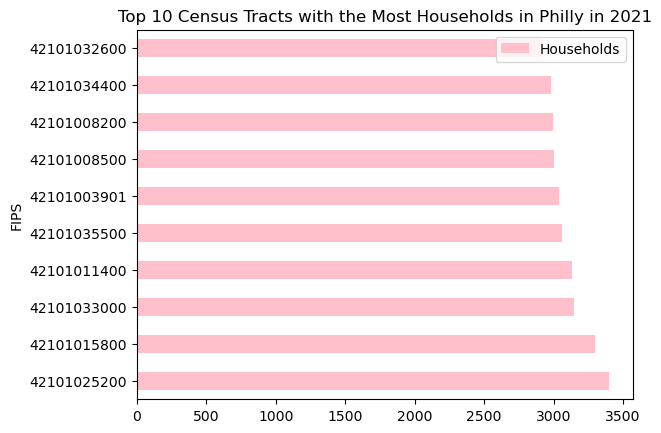

In [115]:
phdf_sorted.head(10).plot.barh(x='FIPS',
                            y='Households', 
                            title='Top 10 Census Tracts with the Most Households in Philly in 2021',
                            color='pink')

I know that the census tract we chose for our area (in df2 below) are 280-285. None of which are reflected here

But we can also look at the household values only for df2 since there are only six tracts. Keep in mind 284 is the tract within which our more specific development site lies

In [116]:
df_sorted = df2.sort_values(by='Households',ascending = False)
df_sorted[['FIPS','Households']].head(10)

,FIPS,Households
3,42101028300,2532
2,42101028200,2216
1,42101028100,1917
0,42101028000,1735
4,42101028400,1363
5,42101028500,1116


In bar chart form:

<AxesSubplot: title={'center': 'Top 10 Census Tracts with the Most Households in Logan,Philadelphia in 2021'}, ylabel='FIPS'>

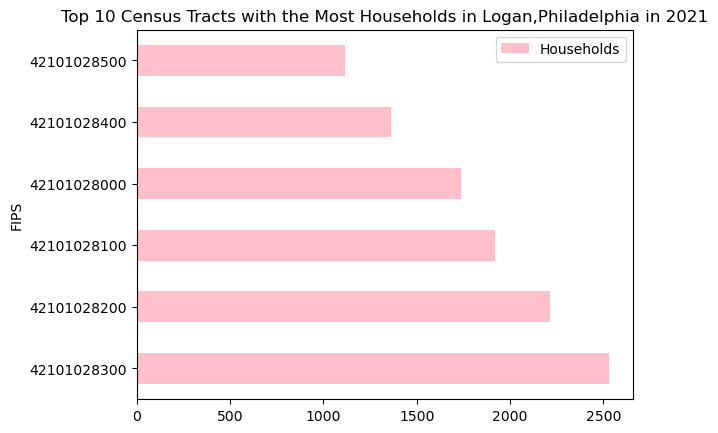

In [117]:
df_sorted.plot.barh(x='FIPS',
                            y='Households', 
                            title='Top 10 Census Tracts with the Most Households in Logan,Philadelphia in 2021',
                            color='pink')

A lower number of households makes sense for tracts 284 and 285 based on the plot of vacant land for redevelopment called Logan Triangle

Lets caluclate the mean # of households per tract making 200,000 dollars or more and the mean # of households per tract making less than $10,000 for the City of Philly and run a query to compare the city averages to the number of households in each of these income groups for each tract in Logan

In [118]:
phdf2['$200,000 or more'].mean()

100.6029411764706

In [119]:
phdf2['Less than $10,000'].mean()

169.85049019607843

In [120]:
df_tracts_in_logan_over_city_average_for_highest_HHIncome_category = df2[df2['$200,000 or more']>100.6029411764706]

In [121]:
print('There are ' + str(len(df_tracts_in_logan_over_city_average_for_highest_HHIncome_category)) + ' census tracts in Logan with more households making $200,000 or over than the City average')

There are 0 census tracts in Logan with more households making $200,000 or over than the City average


In [122]:
df_tracts_in_logan_over_city_average_for_highest_HHIncome_category

,FIPS,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"


In [124]:
df_tracts_in_logan_over_city_average_for_lowest_HHIncome_category = df2[df2['Less than $10,000']>169.85049019607843]

In [125]:
print('There are ' + str(len(df_tracts_in_logan_over_city_average_for_lowest_HHIncome_category)) + ' census tracts in Logan with more households making less than $10,000 than the City average')

There are 4 census tracts in Logan with more households making less than $10,000 than the City average


In [126]:
df_tracts_in_logan_over_city_average_for_lowest_HHIncome_category

,FIPS,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"
0,42101028000,1735,277,166,138,125,35,191,51,166,87,107,107,195,43,21,0,26
2,42101028200,2216,419,350,143,92,60,323,32,0,78,210,99,175,127,0,104,4
3,42101028300,2532,513,507,76,185,48,100,97,112,32,294,471,86,11,0,0,0
4,42101028400,1363,294,185,105,175,92,92,29,36,70,79,49,47,43,67,0,0


From this we can infer that Logan is probably one of the poorer areas of Philadelphia

### Map Time

We already imported Geopandas in the beginning, so good on that.

Let's read in the census tract geojson file downloaded from Open Philly Data

In [129]:
tracts=gpd.read_file('Census_Tracts_2010.geojson')

In [130]:
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


plot

<AxesSubplot: >

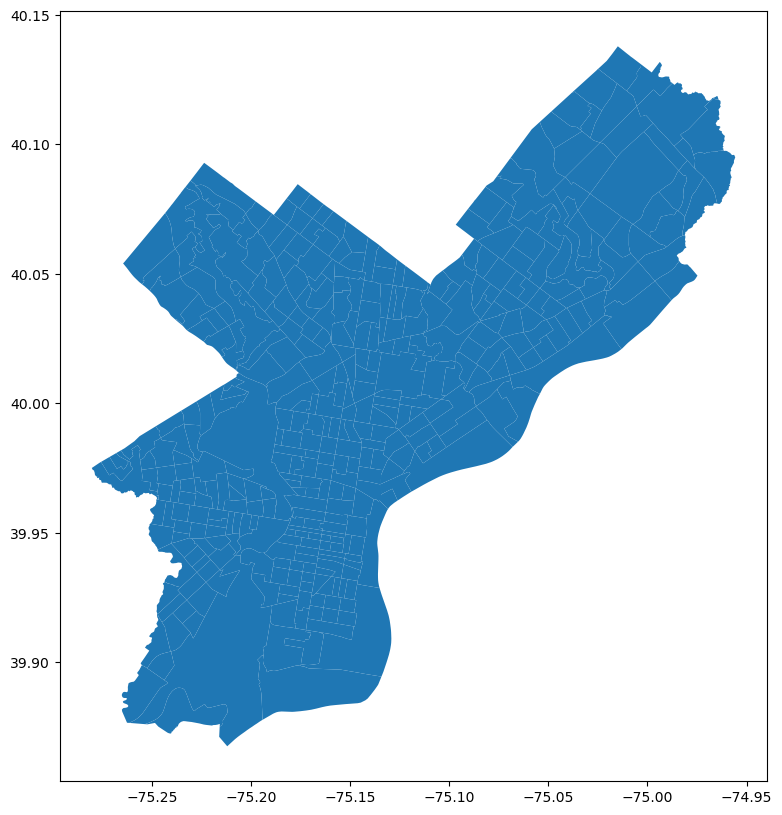

In [131]:
tracts.plot(figsize=(12,10))

that's philly! So cool!!
All done

JUST KIDDING Let's plot some household incomes babyyy

first, getting rid of everything except FIPS and geometry

In [132]:
tracts = tracts[['GEOID10','geometry']]

In [133]:
tracts.head()

,GEOID10,geometry
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [141]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEOID10   384 non-null    object  
 1   geometry  384 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 6.1+ KB


In [142]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FIPS                  6 non-null      object
 1   Households            6 non-null      int64 
 2   Less than $10,000     6 non-null      int64 
 3   $10,000 to $14,999    6 non-null      int64 
 4   $15,000 to $19,999    6 non-null      int64 
 5   $20,000 to $24,999    6 non-null      int64 
 6   $25,000 to $29,999    6 non-null      int64 
 7   $30,000 to $34,999    6 non-null      int64 
 8   $35,000 to $39,999    6 non-null      int64 
 9   $40,000 to $44,999    6 non-null      int64 
 10  $45,000 to $49,999    6 non-null      int64 
 11  $50,000 to $59,999    6 non-null      int64 
 12  $60,000 to $74,999    6 non-null      int64 
 13  $75,000 to $99,999    6 non-null      int64 
 14  $100,000 to $124,999  6 non-null      int64 
 15  $125,000 to $149,999  6 non-null      int64 

In [143]:
phdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FIPS                  408 non-null    object
 1   Households            408 non-null    int64 
 2   Less than $10,000     408 non-null    int64 
 3   $10,000 to $14,999    408 non-null    int64 
 4   $15,000 to $19,999    408 non-null    int64 
 5   $20,000 to $24,999    408 non-null    int64 
 6   $25,000 to $29,999    408 non-null    int64 
 7   $30,000 to $34,999    408 non-null    int64 
 8   $35,000 to $39,999    408 non-null    int64 
 9   $40,000 to $44,999    408 non-null    int64 
 10  $45,000 to $49,999    408 non-null    int64 
 11  $50,000 to $59,999    408 non-null    int64 
 12  $60,000 to $74,999    408 non-null    int64 
 13  $75,000 to $99,999    408 non-null    int64 
 14  $100,000 to $124,999  408 non-null    int64 
 15  $125,000 to $149,999  408 non-null    in

After checking that the data types all match up (as strings), let's merge the datasets based on FIPS!

In [147]:
columns = tracts.columns.to_list()

In [149]:
columns

['GEOID10', 'geometry']

In [151]:
tracts.columns = ['FIPS', 'geometry']

In [152]:
tracts.head()

,FIPS,geometry
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [153]:
tracts_df2=tracts.merge(df2,on="FIPS")

In [154]:
tracts_df2.head()

,FIPS,geometry,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"
0,42101028300,"POLYGON ((-75.14169 40.02076, -75.14159 40.020...",2532,513,507,76,185,48,100,97,112,32,294,471,86,11,0,0,0
1,42101028400,"POLYGON ((-75.13571 40.02392, -75.13555 40.026...",1363,294,185,105,175,92,92,29,36,70,79,49,47,43,67,0,0
2,42101028500,"POLYGON ((-75.13527 40.02919, -75.13541 40.027...",1116,125,136,84,35,31,0,57,52,54,22,63,391,64,0,0,2
3,42101028000,"POLYGON ((-75.15385 40.02217, -75.15336 40.022...",1735,277,166,138,125,35,191,51,166,87,107,107,195,43,21,0,26
4,42101028100,"POLYGON ((-75.14658 40.03065, -75.14652 40.030...",1917,115,247,95,62,129,92,83,114,39,333,59,257,68,22,202,0


And the other dataset

In [155]:
tracts_phdf2=tracts.merge(phdf2,on="FIPS")

In [156]:
tracts_phdf2.head()

,FIPS,geometry,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960...",1803,501,256,86,118,94,105,74,48,76,128,86,125,37,35,4,30
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969...",1569,440,220,40,57,32,199,82,59,33,139,92,123,46,7,0,0
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962...",1553,211,105,51,120,66,151,8,22,142,135,178,141,145,57,21,0
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977...",930,61,114,16,40,10,52,36,37,30,73,45,148,99,60,73,36
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977...",1317,146,151,25,97,109,59,34,14,335,81,49,37,88,15,28,49


CHLOROPLETHS

We can use the average household size in PA and the federal poverty line values per household size (from ASPE.hhs.gov) to approximately map households that fall below this poverty line in Philly and Logan

Average Household size = 2.40 (from Census)

Federal Poverty line is calculated to about $20,000 for a family of this size.

(When I have more time, it would be more accurate to find the poverty line specific to PA or even Philly County)

First we concatenate the column values

In [186]:
tracts_df2['Below the Fed. Poverty Line'] = tracts_df2['Less than $10,000'] + tracts_df2['$10,000 to $14,999'] + tracts_df2['$15,000 to $19,999']

In [187]:
tracts_df2.head()

,FIPS,geometry,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",Below the Fed. Poverty Line
0,42101028300,"POLYGON ((-75.14169 40.02076, -75.14159 40.020...",2532,513,507,76,185,48,100,97,112,32,294,471,86,11,0,0,0,1096
1,42101028400,"POLYGON ((-75.13571 40.02392, -75.13555 40.026...",1363,294,185,105,175,92,92,29,36,70,79,49,47,43,67,0,0,584
2,42101028500,"POLYGON ((-75.13527 40.02919, -75.13541 40.027...",1116,125,136,84,35,31,0,57,52,54,22,63,391,64,0,0,2,345
3,42101028000,"POLYGON ((-75.15385 40.02217, -75.15336 40.022...",1735,277,166,138,125,35,191,51,166,87,107,107,195,43,21,0,26,581
4,42101028100,"POLYGON ((-75.14658 40.03065, -75.14652 40.030...",1917,115,247,95,62,129,92,83,114,39,333,59,257,68,22,202,0,457


In [188]:
tracts_phdf2['Below the Fed. Poverty Line'] = tracts_phdf2['Less than $10,000'] + tracts_phdf2['$10,000 to $14,999'] + tracts_phdf2['$15,000 to $19,999']

In [189]:
tracts_phdf2.head()

,FIPS,geometry,Households,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",Below the Fed. Poverty Line
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960...",1803,501,256,86,118,94,105,74,48,76,128,86,125,37,35,4,30,843
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969...",1569,440,220,40,57,32,199,82,59,33,139,92,123,46,7,0,0,700
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962...",1553,211,105,51,120,66,151,8,22,142,135,178,141,145,57,21,0,367
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977...",930,61,114,16,40,10,52,36,37,30,73,45,148,99,60,73,36,191
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977...",1317,146,151,25,97,109,59,34,14,335,81,49,37,88,15,28,49,322


mapping households in Philly below the federal poverty line in 3 chloropleth styles

<AxesSubplot: >

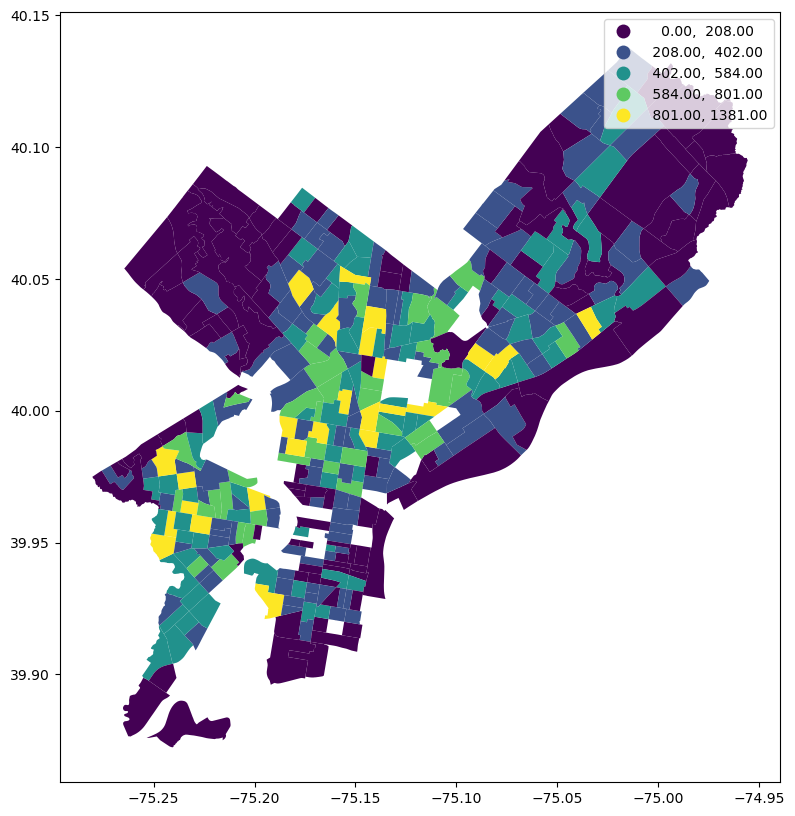

In [190]:
tracts_phdf2.plot(figsize=(12,10),
                 column='Below the Fed. Poverty Line',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

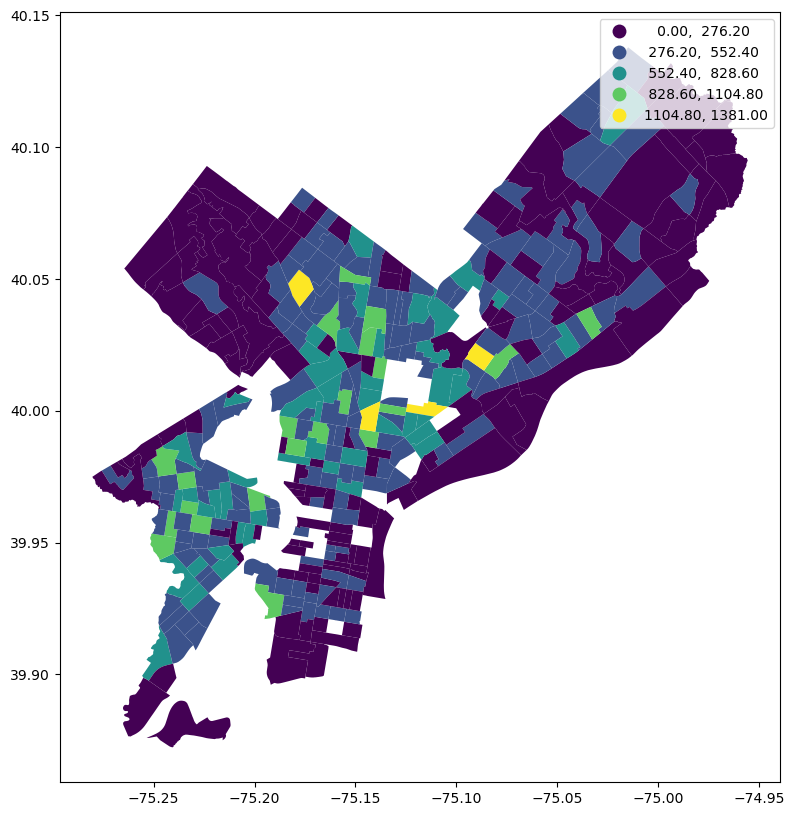

In [191]:
tracts_phdf2.plot(figsize=(12,10),
                 column='Below the Fed. Poverty Line',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

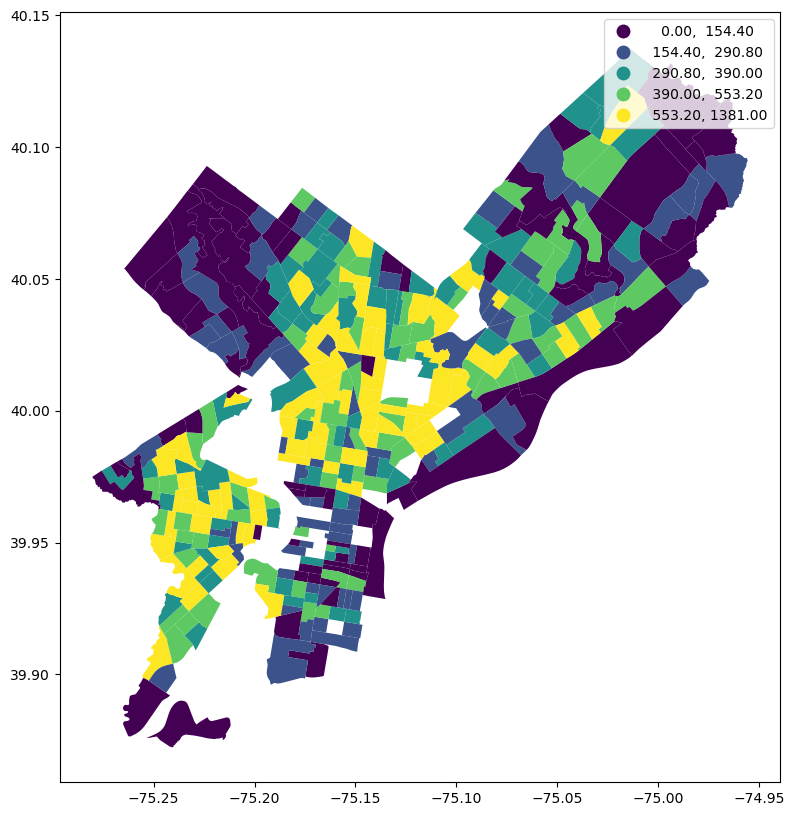

In [192]:
tracts_phdf2.plot(figsize=(12,10),
                 column='Below the Fed. Poverty Line',
                 legend=True, 
                 scheme='quantiles')

The yellow portions on the final map are where at least 80% of households are below the poverty line and qualify for federal assistance

now for logan

<AxesSubplot: >

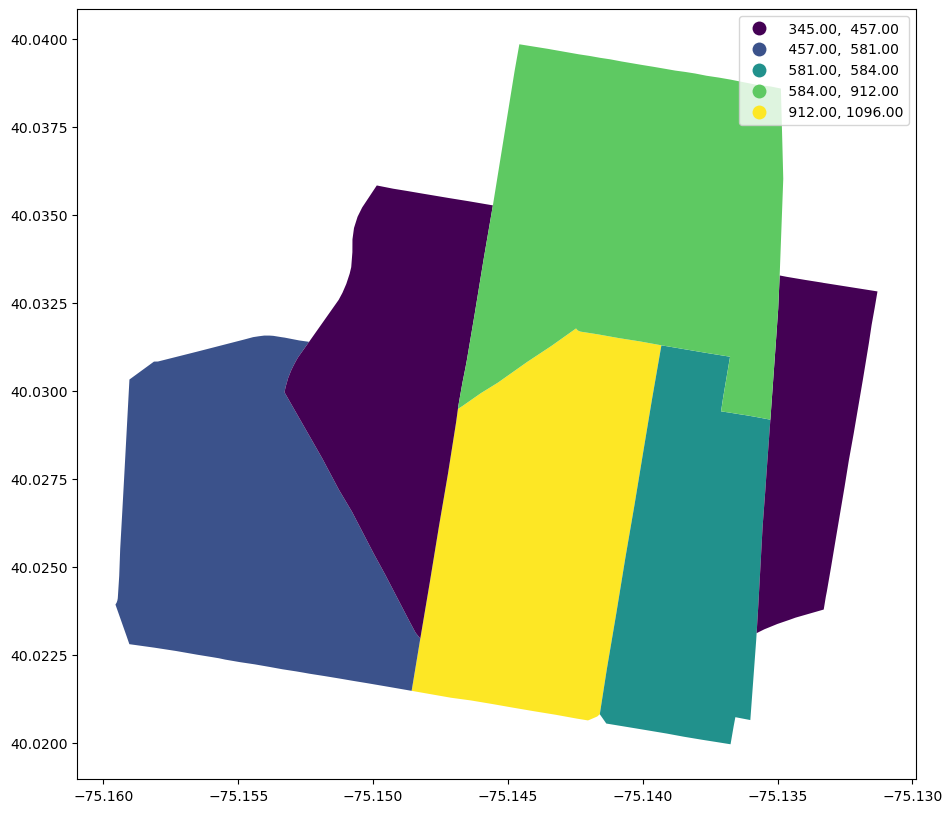

In [197]:
tracts_df2.plot(figsize=(12,10),
                 column='Below the Fed. Poverty Line',
                 legend=True, 
                 scheme='quantiles')

There is one such census tract in Logan. There is also a tract where at least 60% of households are below the FPL, one where at least 40% of households is below the FPL, one where at least 20% of households is below the FPL, and 2 where under 20% of households are below the FPL.